<h1 style="background: #000000; color: white; font-family: 'Roboto', sans-serif; padding: 10px; border-radius: 10px; text-align: center; font-weight:700; font-style: italic;">
  <img src="coder.svg" alt="Curso" style="max-width: 100%; height: auto;">
</h1>
José Armando Ramírez Islas

## Imports

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# PREPROCESSING
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# MODEL
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# METRICS
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# UTILS
import re


In [4]:
tourney_results = pd.read_csv('./data/MNCAATourneyCompactResults.csv')
tourney_seeds = pd.read_csv('./data/MNCAATourneySeeds.csv')
season_results = pd.read_csv('./data/MRegularSeasonCompactResults.csv')
seasons = pd.read_csv('./data/MSeasons.csv')
teams = pd.read_csv('./data/MTeams.csv')

## EXTRACT

In [5]:
tourney_results = pd.read_csv('./data/MNCAATourneyCompactResults.csv')
tourney_seeds = pd.read_csv('./data/MNCAATourneySeeds.csv')
season_results = pd.read_csv('./data/MRegularSeasonCompactResults.csv')
seasons = pd.read_csv('./data/MSeasons.csv')
teams = pd.read_csv('./data/MTeams.csv')

### Teams

**TeamID** 
    
A 4 digit id number, uniquely identifying each NCAA® men's or women's team. A school's TeamID does not change from one year to the next, so for instance the Duke men's TeamID is 1181 for all seasons. The men's team ID's range from 1000-1999, whereas all of the women's team ID's range from 3000-3999.

**TeamName** 

A compact spelling of the team's college name, 16 characters or fewer.

**FirstD1Season** 

The first season in our dataset that the school was a Division-I school. This column is only present in the men's data, so it is not found in WTeams.csv.

**LastD1Season** 

The last season in our dataset that the school was a Division-I school. For any teams that are currently 

**Division-I** 

They will be listed with LastD1Season=2025. Again, this column is only present in the men's data, so it is not found in WTeams.csv.

In [6]:
teams

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025
...,...,...,...,...
375,1476,Stonehill,2023,2025
376,1477,East Texas A&M,2023,2025
377,1478,Le Moyne,2024,2025
378,1479,Mercyhurst,2025,2025


These files identify the different seasons included in the historical data, along with certain season-level properties. There are separate files for men's data (MSeasons) and women's data (WSeasons).

**Season** 

Indicates the year in which the tournament was played.

**DayZero** 

Tells you the date corresponding to DayNum=0 during that season. All game dates have been aligned upon a common scale so that (each year) the Monday championship game of the men's tournament is on DayNum=154. Working backward, the men's national semifinals are always on DayNum=152, the men's "play-in" games are on days 134-135, Selection Sunday is on day 132, the final day of the regular season is also day 132, and so on. All game data includes the day number in order to make it easier to perform date calculations. If you need to know the exact date a game was played on, you can combine the game's 

**"DayNum"** 

With the season's "DayZero". For instance, since day zero during the 2011-2012 season was 10/31/2011, if we know that the earliest regular season games that year were played on DayNum=7, they were therefore played on 11/07/2011. Also note that the men's and women's data share the same DayZero each season, although the women's championship game is not necessarily played on DayNum=154

**RegionW, RegionX, Region Y, Region Z** 

By our competitions' convention, each of the four regions in the final tournament is assigned a letter of W, X, Y, or Z. Whichever region's name comes first alphabetically, that region will be Region W. And whichever Region plays against Region W in the national semifinals, that will be Region X. For the other two regions, whichever region's name comes first alphabetically, that region will be Region Y, and the other will be Region Z. This allows us to identify the regions in a standardized way in other files, even if the region names change from year to year.


In [7]:
seasons

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/02/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast
5,1990,10/30/1989,East,Midwest,Southeast,West
6,1991,10/29/1990,East,Southeast,Midwest,West
7,1992,11/04/1991,East,West,Midwest,Southeast
8,1993,11/02/1992,East,Midwest,Southeast,West
9,1994,11/01/1993,East,Southeast,Midwest,West


### Tourney Seeds

These files identify the seeds for all teams in each NCAA® tournament, for all seasons of historical data. Thus, there are between 64-68 rows for each year, depending on whether there were any play-in games and how many there were. In recent years the structure has settled at 68 total teams, with four "play-in" games leading to the final field of 64 teams entering Round 1 on Thursday/Friday of the first week (by definition, that is DayNum=136/137 each season). We will not know the seeds of the respective tournament teams, or even exactly which 68 teams it will be, until Selection Sunday on March 16, 2025 (DayNum=132).

**Season** 

The year that the tournament was played in

**Seed** 

This is a 3-character or 4-character identifier of the seed, where the first character is either W, X, Y, or Z (identifying the region the team was in) and the next two digits (either 01, 02, ..., 15, or 16) tell you the seed within the region. For play-in teams, there is a fourth character (a or b) to further distinguish the seeds, since teams that face each other in the play-in games will have seeds with the same first three characters. The "a" and "b" are assigned based on which Team ID is lower numerically.

**TeamID** - this identifies the id number of the team, as specified in the MTeams.csv or WTeams.csv file

In [8]:
tourney_seeds

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2553,2024,Z12,1241
2554,2024,Z13,1436
2555,2024,Z14,1324
2556,2024,Z15,1443


In [9]:
pattern = re.compile(r'([A-Z])/(\d{2})')

tourney_seeds['SeedReg'] = tourney_seeds['Seed'].str.extract(r'([A-Z])(\d{2})')[0]
tourney_seeds['SeedNum'] = tourney_seeds['Seed'].str.extract(r'([A-Z])(\d{2})')[1].astype(int)



In [10]:
tourney_seeds.sample(5)

,Season,Seed,TeamID,SeedReg,SeedNum
638,1994,Z15,1259,Z,15
598,1994,X07,1277,X,7
251,1988,Z12,1199,Z,12
509,1992,Z14,1190,Z,14
1414,2007,W01,1314,W,1


### Regular Season Compact Results

These files identify the game-by-game results for many seasons of historical data, starting with the 1985 season for men (the first year the NCAA® had a 64-team men's tournament) and the 1998 season for women. For each season, the file includes all games played from DayNum 0 through 132. It is important to realize that the "Regular Season" games are simply defined to be all games played on DayNum=132 or earlier (DayNum=132 is Selection Sunday, and there are always a few conference tournament finals actually played early in the day on Selection Sunday itself).

**Season** 

This is the year of the associated entry in MSeasons.csv or WSeasons.csv, namely the year in which the final tournament occurs.

**DayNum** 

This integer always ranges from 0 to 132, and tells you what day the game was played on. It represents an offset from the "DayZero" date in the "MSeasons.csv" or "WSeasons.csv" file.

**WTeamID** 

This identifies the id number of the team that won the game, as listed in the "MTeams.csv" or "WTeams.csv" file. No matter whether the game was won by the home team or visiting team, or if it was a neutral-site game, the "WTeamID" always identifies the winning team. Both the men's data and women's data will identify the winning team id by this WTeamID column. The same note applies to WScore and WLoc below - these are "W" for "winning" and not for "women's".

**WScore** 

This identifies the number of points scored by the winning team.

**LTeamID** 

This identifies the id number of the team that lost the game.

**LScore** 

This identifies the number of points scored by the losing team.

**WLoc** 

This identifies the "location" of the winning team. If the winning team was the home team, this value will be "H". If the winning team was the visiting (or "away") team, this value will be "A". If it was played on a neutral court, then this value will be "N".

**NumOT** 

This indicates the number of overtime periods in the game, an integer 0 or higher

In [11]:
season_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
190766,2025,85,1401,75,1328,68,H,0
190767,2025,85,1405,86,1325,83,A,0
190768,2025,85,1428,69,1153,66,H,0
190769,2025,85,1444,74,1123,71,A,0


### Tourney Compact Results

These files identify the game-by-game NCAA® tournament results for all seasons of historical data. The data is formatted exactly like the corresponding Regular Season Compact Results data. All men's games will show up as neutral site (so WLoc is always N) and some women's games will show up as neutral site, depending on the specifics.

Because of the consistent structure of the NCAA® tournament schedule, you can generally tell what round a men's game was, just by looking at its day number. However, the men's 2021 tournament scheduling was slightly different, and the women's scheduling has varied a lot. Nevertheless, in general the men's schedule will be:

DayNum=134 or 135 (Tue/Wed) - play-in games to get the tournament field down to the final 64 teams

DayNum=136 or 137 (Thu/Fri) - Round 1, to bring the tournament field from 64 teams to 32 teams

DayNum=138 or 139 (Sat/Sun) - Round 2, to bring the tournament field from 32 teams to 16 teams

DayNum=143 or 144 (Thu/Fri) - Round 3, otherwise known as "Sweet Sixteen", to bring the tournament field from 16 teams to 8 teams

DayNum=145 or 146 (Sat/Sun) - Round 4, otherwise known as "Elite Eight" or "regional finals", to bring the tournament field from 8 teams to 4 teams

DayNum=152 (Sat) - Round 5, otherwise known as "Final Four" or "national semifinals", to bring the tournament field from 4 teams to 2 teams

DayNum=154 (Mon) - Round 6, otherwise known as "national final" or "national championship", to bring the tournament field from 2 teams to 1 champion team

In [12]:
tourney_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2513,2024,146,1301,76,1181,64,N,0
2514,2024,146,1345,72,1397,66,N,0
2515,2024,152,1163,86,1104,72,N,0
2516,2024,152,1345,63,1301,50,N,0


## Transform

First of all, let's make data integration over all the tables we have to convert data marts into a datawarehouse. Even when we will end up with lots of null values, we'll be able to analize the complete data for each register and make feature selection some way

In [13]:
## Teams JOINED Seeds
t_ts = teams.merge(tourney_seeds, on='TeamID', how='inner')

## Teams_TourneySeeds JOINED Seasons
t_ts_s = t_ts.merge(seasons, on='Season', how='inner')

## Teams_TourneySeeds_Seasons JOINED RegularSeasonResults
s_rsr = t_ts_s.merge(season_results, on='Season', how='inner')

In [14]:
s_rsr

,TeamID,TeamName,FirstD1Season,LastD1Season,Season,Seed,SeedReg,SeedNum,DayZero,RegionW,RegionX,RegionY,RegionZ,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1101,Abilene Chr,2014,2025,2019,Y15,Y,15,11/05/2018,East,West,Midwest,South,1,1104,82,1380,62,H,0
1,1101,Abilene Chr,2014,2025,2019,Y15,Y,15,11/05/2018,East,West,Midwest,South,1,1113,102,1168,94,H,0
2,1101,Abilene Chr,2014,2025,2019,Y15,Y,15,11/05/2018,East,West,Midwest,South,1,1119,73,1265,69,H,0
3,1101,Abilene Chr,2014,2025,2019,Y15,Y,15,11/05/2018,East,West,Midwest,South,1,1120,101,1375,58,H,0
4,1101,Abilene Chr,2014,2025,2019,Y15,Y,15,11/05/2018,East,West,Midwest,South,1,1123,86,1232,69,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11968162,1463,Yale,1985,2025,2024,W13,W,13,11/06/2023,East,West,Midwest,South,132,1120,86,1196,67,N,0
11968163,1463,Yale,1985,2025,2024,W13,W,13,11/06/2023,East,West,Midwest,South,132,1182,57,1433,51,N,0
11968164,1463,Yale,1985,2025,2024,W13,W,13,11/06/2023,East,West,Midwest,South,132,1228,93,1458,87,N,0
11968165,1463,Yale,1985,2025,2024,W13,W,13,11/06/2023,East,West,Midwest,South,132,1412,85,1396,69,N,0


In [15]:
s_rsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968167 entries, 0 to 11968166
Data columns (total 20 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   TeamID         int64 
 1   TeamName       object
 2   FirstD1Season  int64 
 3   LastD1Season   int64 
 4   Season         int64 
 5   Seed           object
 6   SeedReg        object
 7   SeedNum        int64 
 8   DayZero        object
 9   RegionW        object
 10  RegionX        object
 11  RegionY        object
 12  RegionZ        object
 13  DayNum         int64 
 14  WTeamID        int64 
 15  WScore         int64 
 16  LTeamID        int64 
 17  LScore         int64 
 18  WLoc           object
 19  NumOT          int64 
dtypes: int64(11), object(9)
memory usage: 1.8+ GB


In [16]:
s_rsr["TeamA_ID"] = s_rsr[["WTeamID", "LTeamID"]].min(axis=1)
s_rsr["TeamB_ID"] = s_rsr[["WTeamID", "LTeamID"]].max(axis=1)

# Ver los primeros registros
s_rsr[["WTeamID", "LTeamID", "TeamA_ID", "TeamB_ID"]].head()

,WTeamID,LTeamID,TeamA_ID,TeamB_ID
0,1104,1380,1104,1380
1,1113,1168,1113,1168
2,1119,1265,1119,1265
3,1120,1375,1120,1375
4,1123,1232,1123,1232


Then we'll make new columns: `Team1_ID` y `Team2_ID` since we would have them as entries and `WTeamID` will throw the label

In [17]:
s_rsr.sample(10)

,TeamID,TeamName,FirstD1Season,LastD1Season,Season,Seed,SeedReg,SeedNum,DayZero,RegionW,RegionX,RegionY,RegionZ,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,TeamA_ID,TeamB_ID
10842159,1436,Vermont,1985,2025,2010,Z16,Z,16,11/02/2009,East,South,Midwest,West,124,1449,82,1333,70,A,0,1333,1449
10793682,1435,Vanderbilt,1985,2025,2008,X04,X,4,11/05/2007,East,Midwest,South,West,61,1273,77,1244,75,A,1,1244,1273
4268146,1243,Kansas St,1985,2025,2017,Z11a,Z,11,10/31/2016,East,West,Midwest,South,96,1422,81,1359,75,A,0,1359,1422
5437828,1276,Michigan,1985,2025,2012,X04,X,4,10/31/2011,East,Midwest,South,West,44,1158,71,1397,65,H,0,1158,1397
2971786,1208,Georgia,1985,2025,1996,Z08,Z,8,10/30/1995,East,Midwest,Southeast,West,60,1113,62,1374,58,H,0,1113,1374
6599618,1308,New Mexico St,1985,2025,2014,Z13,Z,13,11/04/2013,East,South,Midwest,West,103,1293,72,1183,60,H,0,1183,1293
3282840,1216,Hartford,1985,2023,2021,Z16,Z,16,11/02/2020,East,West,Midwest,South,59,1112,80,1449,53,A,0,1112,1449
5454110,1276,Michigan,1985,2025,2016,W11a,W,11,11/02/2015,East,Midwest,South,West,50,1409,90,1319,55,H,0,1319,1409
10267741,1422,UNC Greensboro,1992,2025,2018,Z13,Z,13,10/30/2017,East,Midwest,South,West,94,1396,81,1455,79,H,1,1396,1455
1532896,1157,Coastal Car,1987,2025,2014,W16,W,16,11/04/2013,East,South,Midwest,West,25,1167,61,1319,50,N,0,1167,1319


In [18]:
s_rsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968167 entries, 0 to 11968166
Data columns (total 22 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   TeamID         int64 
 1   TeamName       object
 2   FirstD1Season  int64 
 3   LastD1Season   int64 
 4   Season         int64 
 5   Seed           object
 6   SeedReg        object
 7   SeedNum        int64 
 8   DayZero        object
 9   RegionW        object
 10  RegionX        object
 11  RegionY        object
 12  RegionZ        object
 13  DayNum         int64 
 14  WTeamID        int64 
 15  WScore         int64 
 16  LTeamID        int64 
 17  LScore         int64 
 18  WLoc           object
 19  NumOT          int64 
 20  TeamA_ID       int64 
 21  TeamB_ID       int64 
dtypes: int64(13), object(9)
memory usage: 2.0+ GB


In [19]:
s_rsr.sample(10)

,TeamID,TeamName,FirstD1Season,LastD1Season,Season,Seed,SeedReg,SeedNum,DayZero,RegionW,RegionX,RegionY,RegionZ,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,TeamA_ID,TeamB_ID
3086397,1210,Georgia Tech,1985,2025,2005,W05,W,5,11/01/2004,Albuquerque,Chicago,Austin,Syracuse,107,1103,69,1325,49,A,0,1103,1325
3145337,1211,Gonzaga,1985,2025,2007,Z10,Z,10,10/30/2006,East,South,Midwest,West,90,1458,57,1234,46,A,0,1234,1458
8430219,1361,San Diego St,1985,2025,2015,X08,X,8,11/03/2014,East,South,Midwest,West,20,1220,93,1447,71,H,0,1220,1447
8594894,1371,Seton Hall,1985,2025,2019,Y10,Y,10,11/05/2018,East,West,Midwest,South,68,1441,94,1154,82,A,0,1154,1441
8079283,1345,Purdue,1985,2025,2017,Y04,Y,4,10/31/2016,East,West,Midwest,South,84,1313,74,1164,64,A,0,1164,1313
5446545,1276,Michigan,1985,2025,2013,X04,X,4,11/05/2012,East,South,Midwest,West,121,1361,58,1102,51,H,0,1102,1361
5015624,1266,Marquette,1985,2025,2023,W02,W,2,10/31/2022,East,South,Midwest,West,68,1163,69,1166,60,H,0,1163,1166
9868617,1409,Tulsa,1985,2025,2014,X13,X,13,11/04/2013,East,South,Midwest,West,89,1392,56,1216,52,H,0,1216,1392
9547331,1400,Texas,1985,2025,1997,W10,W,10,10/28/1996,East,Southeast,Midwest,West,89,1218,85,1361,63,A,0,1218,1361
3519284,1228,Illinois,1985,2025,2005,X01,X,1,11/01/2004,Albuquerque,Chicago,Austin,Syracuse,41,1192,82,1447,75,A,0,1192,1447


## Load

In [20]:
df = s_rsr.copy()

## Preprocessing

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968167 entries, 0 to 11968166
Data columns (total 22 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   TeamID         int64 
 1   TeamName       object
 2   FirstD1Season  int64 
 3   LastD1Season   int64 
 4   Season         int64 
 5   Seed           object
 6   SeedReg        object
 7   SeedNum        int64 
 8   DayZero        object
 9   RegionW        object
 10  RegionX        object
 11  RegionY        object
 12  RegionZ        object
 13  DayNum         int64 
 14  WTeamID        int64 
 15  WScore         int64 
 16  LTeamID        int64 
 17  LScore         int64 
 18  WLoc           object
 19  NumOT          int64 
 20  TeamA_ID       int64 
 21  TeamB_ID       int64 
dtypes: int64(13), object(9)
memory usage: 2.0+ GB


In [22]:
df.sample(10)

,TeamID,TeamName,FirstD1Season,LastD1Season,Season,Seed,SeedReg,SeedNum,DayZero,RegionW,RegionX,RegionY,RegionZ,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,TeamA_ID,TeamB_ID
10506228,1428,Utah,1985,2025,2002,Y12,Y,12,10/29/2001,East,Midwest,South,West,126,1418,67,1114,53,N,0,1114,1418
3440229,1227,IL Chicago,1985,2025,1998,W09,W,9,10/27/1997,East,West,Midwest,South,75,1417,68,1332,66,H,0,1332,1417
9401363,1396,Temple,1985,2025,2012,X05,X,5,10/31/2011,East,Midwest,South,West,86,1243,69,1403,47,A,0,1243,1403
35030,1103,Akron,1985,2025,2013,X12,X,12,11/05/2012,East,South,Midwest,West,59,1280,97,1309,46,H,0,1280,1309
5054343,1268,Maryland,1985,2025,1995,X03,X,3,10/31/1994,East,West,Midwest,Southeast,68,1369,59,1184,52,H,0,1184,1369
2688501,1199,Florida St,1985,2025,1988,Z12,Z,12,11/02/1987,East,Midwest,Southeast,West,103,1267,70,1202,69,A,0,1202,1267
3269770,1214,Hampton,1996,2025,2011,X16,X,16,11/01/2010,East,West,Southeast,Southwest,103,1156,86,1464,76,H,0,1156,1464
7647278,1335,Penn,1985,2025,2000,W13,W,13,11/01/1999,East,South,Midwest,West,29,1447,71,1250,68,A,0,1250,1447
10532735,1428,Utah,1985,2025,2016,X03,X,3,11/02/2015,East,Midwest,South,West,56,1222,76,1311,49,H,0,1222,1311
8328767,1356,S Illinois,1985,2025,2003,Y11,Y,11,11/04/2002,East,South,Midwest,West,19,1259,83,1288,80,A,0,1259,1288


In [23]:
df['Winner'] = (df['WTeamID'] == df['TeamA_ID']).astype(int)

if 'SeedNum' in df.columns:
    df['SeedDiff'] = df.groupby(['Season', 'TeamA_ID'])['SeedNum'].transform('first') - df.groupby(['Season', 'TeamB_ID'])['SeedNum'].transform('first')


df['ScoreDiff'] = df['WScore'] - df['LScore']
# Diferencia de puntuación promedio por equipo
df['Avg_ScoreDiff_TeamA'] = df.groupby(['Season', 'TeamA_ID'])['ScoreDiff'].transform('mean')
df['Avg_ScoreDiff_TeamB'] = df.groupby(['Season', 'TeamB_ID'])['ScoreDiff'].transform('mean')

# Tasa de victorias por equipo
df['Win_Rate_TeamA'] = df.groupby(['Season', 'TeamA_ID'])['Winner'].transform('mean')
df['Win_Rate_TeamB'] = df.groupby(['Season', 'TeamB_ID'])['Winner'].transform('mean')

# Tasa de victorias en casa
df['Home_Win_Rate_TeamA'] = df.groupby(['Season', 'TeamA_ID'])['WLoc'].transform(lambda x: (x == 1).mean())
df['Home_Win_Rate_TeamB'] = df.groupby(['Season', 'TeamB_ID'])['WLoc'].transform(lambda x: (x == 1).mean())

In [24]:
features = ['Season', 'DayNum', 'TeamA_ID', 'TeamB_ID', 'NumOT', 'SeedDiff', 'Avg_ScoreDiff_TeamA', 'Avg_ScoreDiff_TeamB', 'Win_Rate_TeamA', 'Win_Rate_TeamB', 'Home_Win_Rate_TeamA', 'Home_Win_Rate_TeamB']

X = df[features].fillna(0)
y = df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# ESCALAMIENTO DE DATOS
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

We'll use some clasifiers

In [26]:
models = LogisticRegression(max_iter=1000), RandomForestClassifier(max_depth=15, random_state=42, n_estimators=200), XGBClassifier(eval_metric='logloss')

accuracies = {}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[model.__class__.__name__] = accuracy_score(y_test, y_pred)

/tmp/ipykernel_17905/3415265066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


<Axes: >

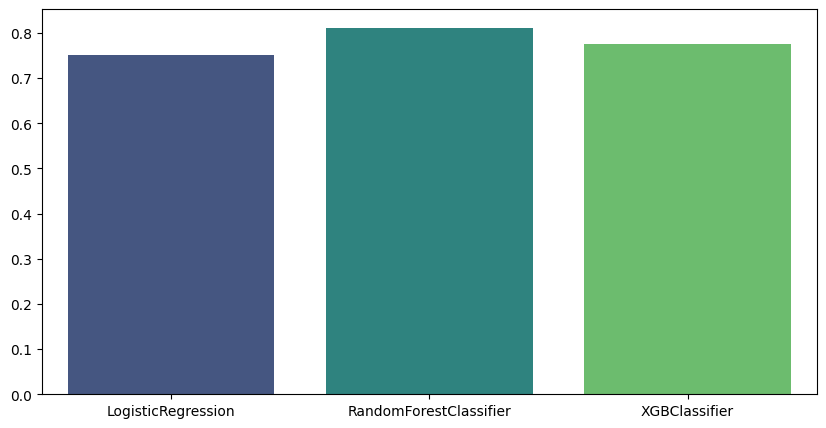

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')

In [28]:
accuracies

{'LogisticRegression': 0.7509936773959595,
 'RandomForestClassifier': 0.8119850403194473,
 'XGBClassifier': 0.7763751684676939}

After the work done we have XGBoostClassifier is the best model, so we only need to make a selection of features about this model to try to optimize its performance